Import modules

In [16]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

Load tutorial data

In [72]:
da = xr.tutorial.open_dataset("air_temperature").air
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

Create fake sampling

<xarray.DataArray 'air' (points: 2920)>
array([262.29000854, 259.76059743, 259.31304187, ..., 256.80115948,
       257.04572761, 259.19666047])
Coordinates:
    lon      (points) float64 245.0 245.5 246.1 246.6 ... 243.4 243.9 244.5
    lat      (points) float64 45.0 45.54 46.08 46.61 ... 42.85 43.39 43.92 44.46
    time     (points) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Dimensions without coordinates: points
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

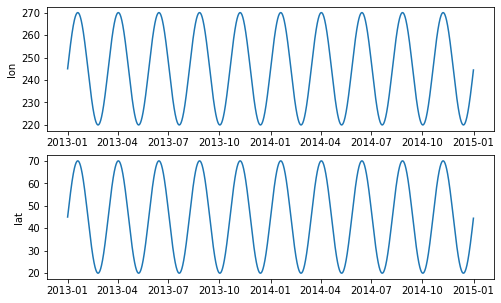

In [107]:
n = da.time.size # number of time points
ncycle = 10 # number of crossings
A = 50 # amplitude of the crossings

# create survey data
survey = xr.Dataset(
    dict(
        lon = xr.DataArray(A*(np.sin(2*np.pi*np.arange(n)/(n/ncycle))+1)/2 + 220,dims='points'),
        lat = xr.DataArray(A*(np.sin(2*np.pi*np.arange(n)/(n/ncycle))+1)/2 + 20,dims='points'),
        time = xr.DataArray(da.time.data,dims='points'),
    )
)

# plot survey lon and lat with time
fig,ax = plt.subplots(2,1,figsize=(8,5))
ax[0].plot(survey.time,survey.lon)
ax[1].plot(survey.time,survey.lat)
ax[0].set(ylabel='lon')
ax[1].set(ylabel='lat')


# interpolate model data to survey data
dai = da.interp(survey)
dai

Plot map and interpolated data

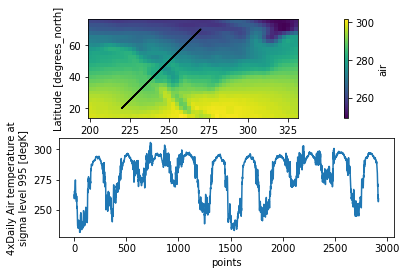

In [108]:
fig,ax = plt.subplots(2,1)

da.mean('time').plot(ax=ax[0])
ax[0].plot(dai.lon,dai.lat,'-k')
ax[0].axis('scaled')

dai.plot(ax=ax[1])